In [1]:
# Gradient Boosting
#

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np 

In [3]:
cancer = load_breast_cancer()

In [4]:
#유방암 데이터 

In [ ]:
#Train set ,Test set 

In [7]:
cancer.keys()

dict_keys(['DESCR', 'data', 'feature_names', 'filename', 'target_names', 'target'])

In [8]:
X = cancer['data']
y = cancer['target']

In [31]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=999)

In [32]:
X_train.shape

(398, 30)

In [33]:
gbc = GradientBoostingClassifier(random_state=999)
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=999,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
#훈련셋트 정확도 : 
#테스트셋 정확도 : 
gbc.fit(X_train,y_train)
print(gbc.score(X_train,y_train))
print(gbc.score(X_test,y_test))

1.0
0.9649122807017544


In [19]:
#과대적합을 막기위해서 학습률을 낮춘다 . 

gbc = GradientBoostingClassifier(random_state=999, learning_rate=0.01)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=999,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [21]:
print(gbc.score(X_train,y_train))
print(gbc.score(X_test,y_test))

0.9824120603015075
0.9298245614035088


In [22]:
gbc = GradientBoostingClassifier(random_state=999, learning_rate=0.01,max_depth=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=999,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
print(gbc.score(X_train,y_train))
print(gbc.score(X_test,y_test))

0.9296482412060302
0.8947368421052632


In [24]:
print("특성 중요도 : {}".format(gbc.feature_importances_))

특성 중요도 : [0.         0.         0.         0.         0.         0.
 0.         0.17913181 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.31301025 0.         0.32479821 0.
 0.         0.         0.         0.18305973 0.         0.        ]


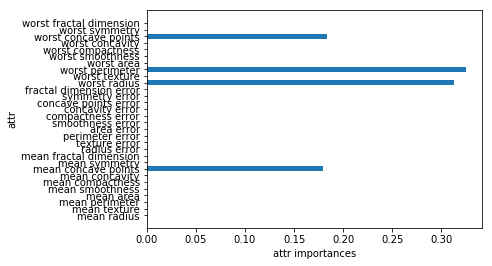

In [28]:
#특성 중요도 시각화 
def plot_featrue_importances_cance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('attr importances')
    plt.ylabel('attr')
    plt.show()
plot_featrue_importances_cance(gbc)

In [29]:
#특성 중요도가 비슷하다. 
#그래디언트 부스팅은 일부 특성 완전 무시 

#안정적인 랜덤 포레스트를 먼저 적용 

#장점 
# 지도 학습에서 가장 강력하고 널리 사용되는 모델중 하나
# 단점 : 매개변수 조정을 잘해야한다. 훈련 시간이 길다.
#     고차원 데이터에는 잘 작동하지 않는다.


#매개변수 
#n_estimators 가 클수록 모델이 복잡해지고 과대적합할 가능성이 높아진다.

#learning_rate 를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야한다
#n_estimators 를 맞추고 나서 적절한 learning_rate를 찾는것이 좋다
#통상 max_depth 는 5보다 깊어지지 않게 하는것이 좋다 